In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ORIGINAL')

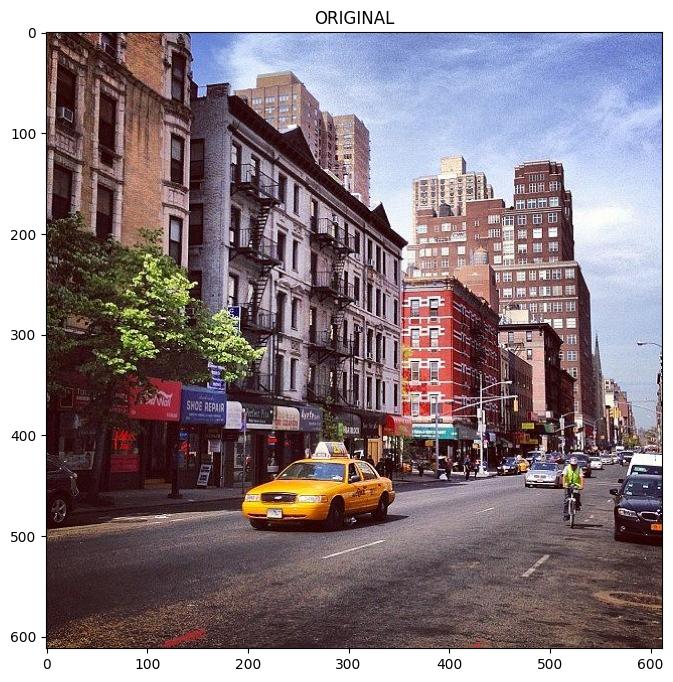

In [6]:
img = cv.imread(cv.samples.findFile("./taxiandbike.jpg"))

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.title("ORIGINAL")

In [4]:
img.shape

(612, 612, 3)

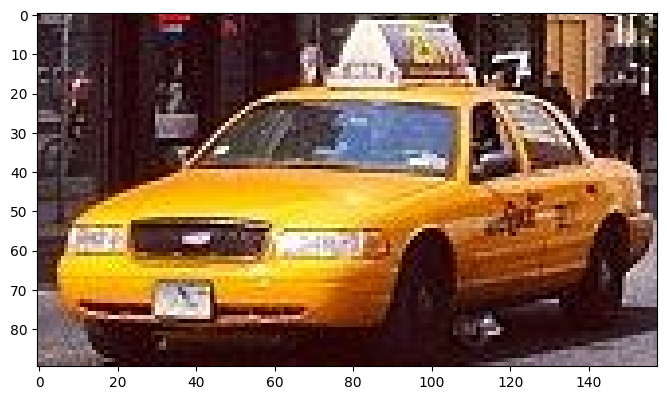

In [19]:
taxi = img[405:495, 190:348]

plt.figure(figsize=(8,8))
plt.imshow(taxi[:,:,::-1])

In [22]:
b,g,r = cv.split(taxi)
taxi_color = cv.merge((b,g,r))

In [25]:
cv.imwrite("taxi.jpg", taxi_color)

True

In [39]:
taxi_gray = cv.imread("taxi.jpg", cv.IMREAD_GRAYSCALE)
img_gray = cv.imread("taxiandbike.jpg", cv.IMREAD_GRAYSCALE) 

In [46]:
sift = cv.SIFT_create()

kp1, des1 = sift.detectAndCompute(img_gray,None)
kp2, des2 = sift.detectAndCompute(taxi_gray,None)

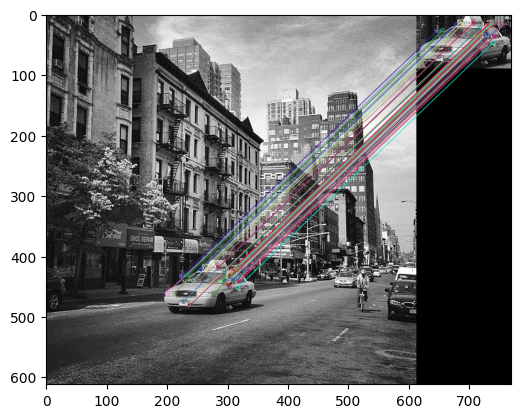

(<matplotlib.image.AxesImage at 0x1ba39957220>, None)

In [48]:
bf = cv.BFMatcher()

matches_knn = bf.knnMatch(des1,des2,k=2)

good_matches_knn = []

for m,n in matches_knn:
    if m.distance < 0.05*n.distance:
        good_matches_knn.append([m])

img_match_knn = cv.drawMatchesKnn(img_gray,kp1,taxi_gray,kp2,good_matches_knn,None,
                                  flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_match_knn),plt.show()